## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|

Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы долларов)
EU_sales — продажи в Европе (миллионы долларов)
JP_sales — продажи в Японии (миллионы долларов)
Other_sales — продажи в других странах (миллионы долларов)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
from pymystem3 import Mystem
m = Mystem()
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats as st
import matplotlib.pyplot as plt
from IPython.display import display

## Просмотр и обработка данных

In [2]:
df = pd.read_csv("/datasets/games.csv", sep=",")

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как видно, в 2 х столбцах Name и Genre 16713 строк, в отличие от 16715 в остальных. Проверим, вдруг окажется в одинаковых строках пропуски

In [5]:
df.columns = [x.lower() for x in df.columns]# привели к ниженму регистру названия столбцов

In [6]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как пропуски в одних и тех же строках и мы никак не можем их заполнить. Мы их удалим.

In [9]:
df.dropna(subset=['name'], inplace=True)
df.reset_index(inplace=True,drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Практически половина данных отсутствует по столбцам critic_score, rating и user_score.

Как поступим:

critic_score - оценка критиков - вполне возможно, что игры не оценивались критиками, т.к. тогда не было такого "обычая". Было бы неправильно заполнить рейтинг игры средним или медианой, даже если бы мы их считали внутри для каждого жанра отдельно. Тем не менее, чтобы иметь возможность быстрой фильтрации данных и возможность их беспрепятственно обрабатывать, поставим этим играм рейтинг -1 (вдруг у какой-то игры есть нулевой рейтинг, поставив -1, мы никогда не перемешаем игры с NaN и с реально нулевым рейтингом);   \
rating - рейтинг от ESRB - может быть, в те времена не было такой организации, вот и рейтинга от неё тоже нет. Здесь то же самое. Невозможно дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Поставим рейтинг "No ESRB";
user_score - те же причины, вероятно, ранее не было сервисов, которые собирали бы рейтинги игроков. Поэтому и присутствуют пропуски. Поступим так же, как и со столбцом critic_score.    \
Столбец year_of_release (год выпуска игры) имеет номного пропусков. Не много, но неприятно. Средними/медианами эти пропуски не заполнить, эти данные не являются самыми важными для анализа данных, да и пропусков в столбце не так много. Другими словами, целых данных достаточно для анализа, поэтому оставляем как есть.   \

Ни по одному столбцу заполнить пропуски хотя бы усредненными данными не представляется возможным. Тем не менее, заполним их "нереальными" данными для возможности спокойно работать с этими строками по другим параметрам.  \

In [11]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

df['user_score'] = df['user_score'].fillna(-1)
df['year_of_release']=df['year_of_release'].fillna(2100)

df['rating']=df['rating'].fillna(-1)
df['user_score'] = df['user_score'].astype('float')


In [12]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [13]:
df['name'].sort_values(ascending=True).unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'uDraw Studio: Instant Artist', 'wwe Smackdown vs. Raw 2006',
       '¡Shin Chan Flipa en colores!'], dtype=object)

In [14]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
# добавим колонку total_sales( общие продажи по всем регионам)

In [15]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,-1,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,-1,28.31


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [17]:
df['user_score'].unique()



array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

## Исследовательский анализ данных

### Сколько игр выпускалось за разные годы. Важны ли эти данные за все периоды

In [18]:
time_release = df.groupby('year_of_release')['name'].count().reset_index()
time_release.columns = ['year', 'quantity']
time_release

,year,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


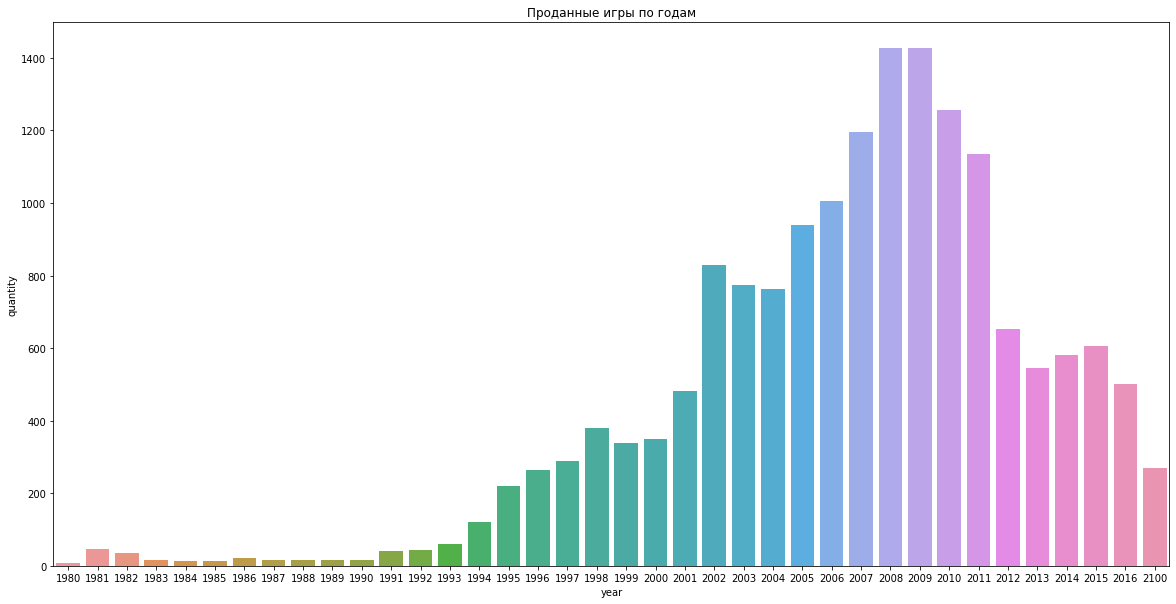

In [19]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'year', y = 'quantity', data = time_release)
plt.title("Проданные игры по годам")
plt.show()
# Черная линия указывает на интервал доверенности

По графику видно, что самый большой пик продаж пришелся на 2008-2009 годы. После- пошел на спад, в связи с появлением мобильных гаджетов.

### Как менялись продажи по платформам

In [20]:
plat=df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

platt=df.pivot_table('total_sales', 
                index = 'platform', 
                aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(20)
platt

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


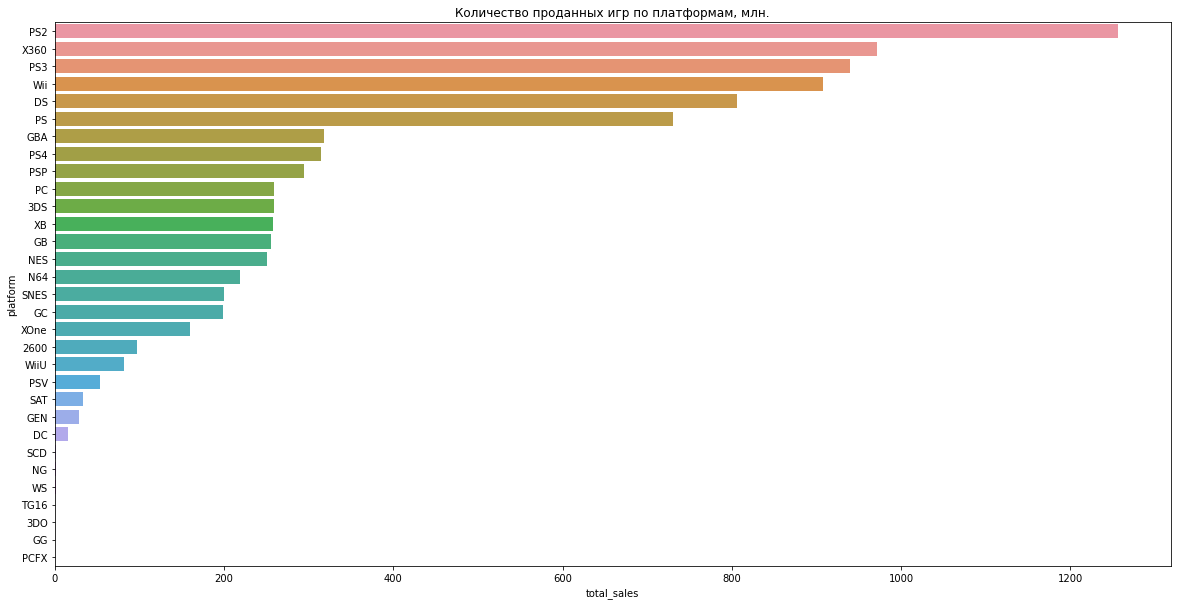

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'total_sales', y = 'platform', data = plat)
plt.title("Количество проданных игр по платформам, млн.")
plt.show()

Видим, что наибольшее число продаж приходится на платформы PS2,X360,PS3,Wii,DS и PS. Их мы и будем изучать.  Причем разница в продажах между популярными и не очень популярными очень заметна.(почти в 2,5 раза). Среди всех популярных платформ сильно выделяетс PS2(более 1200 млн проданных копий)

In [22]:
popul_plat=df[df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])]
popul_plat=platt.head(6).index.to_list()
popul_plat
popul_platt=df.query('platform.isin(@popul_plat)').pivot_table(index='year_of_release', 
                                                                            columns='platform', 
                                                                            values='total_sales', 
                                                                            aggfunc='sum')
popul_platt

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


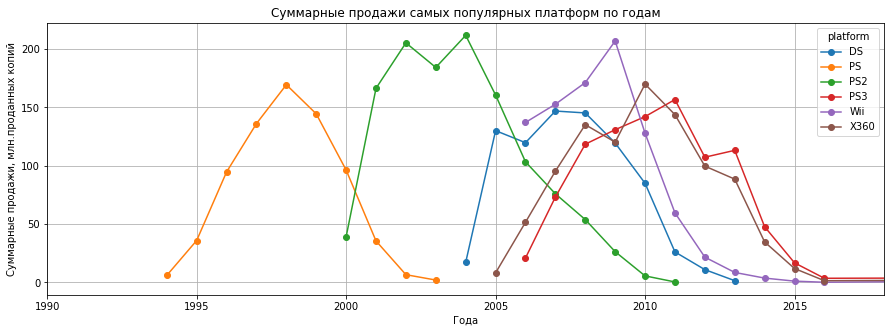

In [23]:
popul_platt.plot(grid=True, figsize=(15, 5), style ='o-')
plt.xlim(1990, 2018)
plt.title('Суммарные продажи самых популярных платформ по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
plt.show()

По графику видно, что средняя "продолжительность" платформ 10-12 лет. За это время они проходят все стадии: от начала запуска и появления популярности, до спада и прекращения продаж. У платформы PS2 было 2 пика популярности, но это и не удивительно... в это время не было альтернативы. после 2005 года сразу несколько платформ боролись за пользователей. Причем Wii начала продажи сразу отлично( около 140 млн проданный копий), когда остальные начинали с 10 млн проданный копий. 

### Прогноз на 2017 год

In [24]:
plat_2012=df.query('2012<year_of_release<2020')

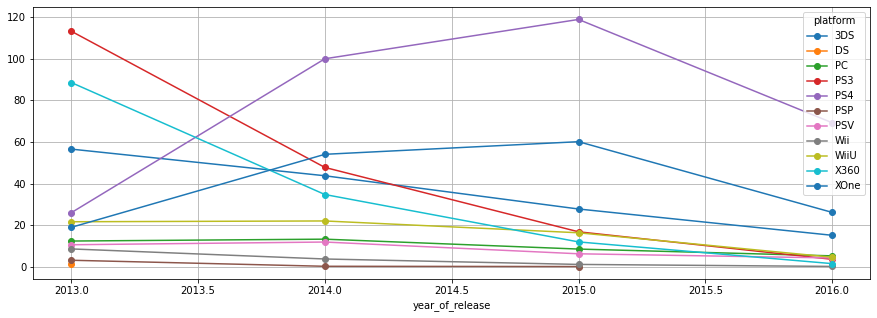

In [25]:
plat_2012.pivot_table(index='year_of_release',
                      columns='platform',
                      values='total_sales',
                      aggfunc='sum').plot(grid=True, figsize=(15, 5), style ='o-')
plt.show()

Видим, что популярность игрвых платформ падает. В лидерах конечно остаются еще PS4 и XOne. Но и они теряют своих покупателей.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Для построения "ящика с усами" возьмем те же популярные платформы. 

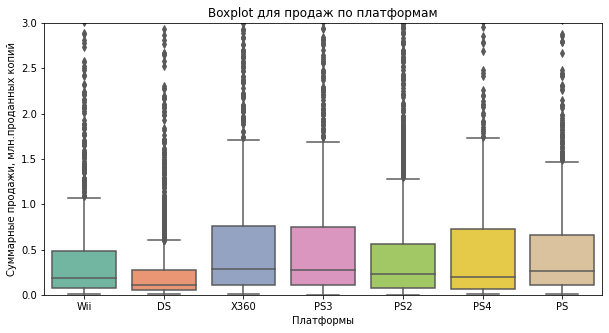

In [26]:
top_plat=['PS2','X360','PS3','Wii','DS','PS','PS4']
plt.figure(figsize=(10,5))
top_plat_box=sns.boxplot(x="platform", y="total_sales", data=df.query('platform.isin(@top_plat)'), palette="Set2")
top_plat_box.set (ylim=(0,3))
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Платформы')
plt.title('Boxplot для продаж по платформам')
plt.show()

Медианные значения таких платформ, как Х360,PS3,PS2,PS4,PS находятся на одном уровне. А вот 3 квартили имеют отличие по всем платформам. Очень узкий ящик у DS.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

In [27]:
games_ps3 = df[(df['platform'] == 'PS3') & (df['critic_score'] > 0)].copy()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


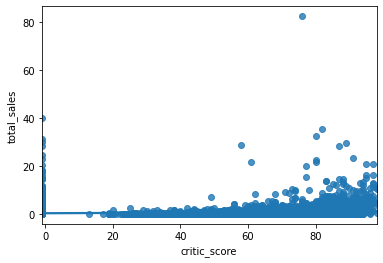

In [28]:
sns.regplot('critic_score', 'total_sales', data=df);

In [29]:
games_ps3_user = df[(df['platform'] == 'PS3') & (df['user_score'] > 0)].copy()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


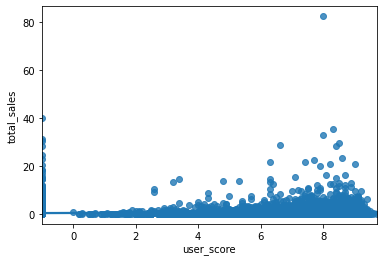

In [30]:
sns.regplot('user_score', 'total_sales', data=df);

По диаграммам рассеивания видно, что с увеличением оценки и пользователей и критиков- увеличиваются и продажи. Но критикам не совсем доверяют, больше доверия "своим" геймерам. так как продаж от высоких оценок больше у пользователей.
То что видим не естественные данные (-1) это были пропуски в значениях user_score и critic_score.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.046999,-0.010530,-0.094263,0.007349,0.066637,0.068531,-0.046038
na_sales,-0.046999,1.000000,0.765341,0.449668,0.638695,0.153039,0.138410,0.941021
eu_sales,-0.010530,0.765341,1.000000,0.435079,0.722796,0.170066,0.152198,0.901239
jp_sales,-0.094263,0.449668,0.435079,1.000000,0.291090,-0.044180,-0.034898,0.612334
other_sales,0.007349,0.638695,0.722796,0.291090,1.000000,0.175632,0.164778,0.749280
critic_score,0.066637,0.153039,0.170066,-0.044180,0.175632,1.000000,0.818959,0.148076
user_score,0.068531,0.138410,0.152198,-0.034898,0.164778,0.818959,1.000000,0.135123
total_sales,-0.046038,0.941021,0.901239,0.612334,0.749280,0.148076,0.135123,1.000000


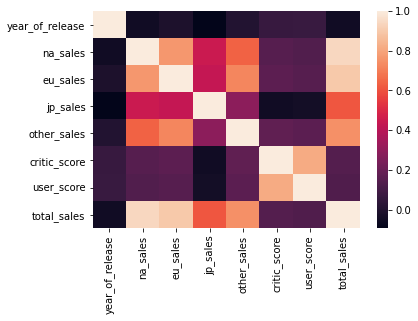

In [31]:
sns.heatmap(df.corr())
df.corr()

### Общее распределение прибыли по жанрам

In [32]:
top_genres=df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
top_genres.columns=['genre','total']
top_genres

,genre,total
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


Самые продаваемые игры в жанре action - более 1744 млн продаж, за ними идут Sports и Shooter. Меньше всего продаж игр в жанре Strategy 174 млн продаж. (В 10 раз меньше самого продаваемого жанра).

Для наглядности построим столбчатую диаграмму.

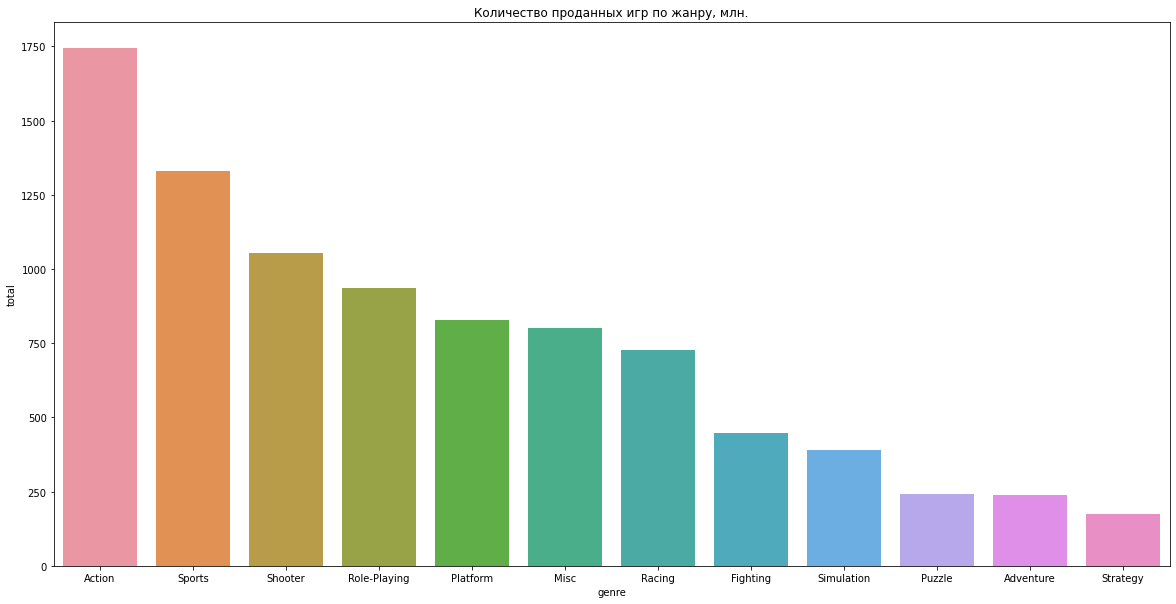

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='genre',y= 'total',data=top_genres)
plt.title("Количество проданных игр по жанру, млн.")
plt.show()

## Составьте портрет пользователя каждого региона

In [34]:
user_plat=df[['platform','genre','na_sales','eu_sales','jp_sales','other_sales']]
user_plat

,platform,genre,na_sales,eu_sales,jp_sales,other_sales
0,Wii,Sports,41.36,28.96,3.77,8.45
1,NES,Platform,29.08,3.58,6.81,0.77
2,Wii,Racing,15.68,12.76,3.79,3.29
3,Wii,Sports,15.61,10.93,3.28,2.95
4,GB,Role-Playing,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...
16708,PS3,Action,0.00,0.00,0.01,0.00
16709,X360,Sports,0.00,0.01,0.00,0.00
16710,PSV,Adventure,0.00,0.00,0.01,0.00
16711,GBA,Platform,0.01,0.00,0.00,0.00


Для наглядности сагрегировала таблицу, где находятся данные по продажам в разных регионах , виды игровых платформ и жанры игр.

### Топ-5 популярных платформ по регионам

In [35]:
pivot = user_plat.pivot_table(user_plat,  index=['platform'], aggfunc=np.sum).sort_values(by='eu_sales',ascending=False).head(7)
pivot

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
PS2,339.29,139.20,583.84,193.44
PS3,330.29,80.19,393.49,135.68
X360,270.76,12.43,602.47,85.76
Wii,262.21,69.33,496.90,79.07
PS,213.61,139.82,336.52,40.91
DS,188.89,175.57,382.40,59.26
PC,142.44,0.17,94.53,22.38


Text(0.5, 0, 'Платформы')

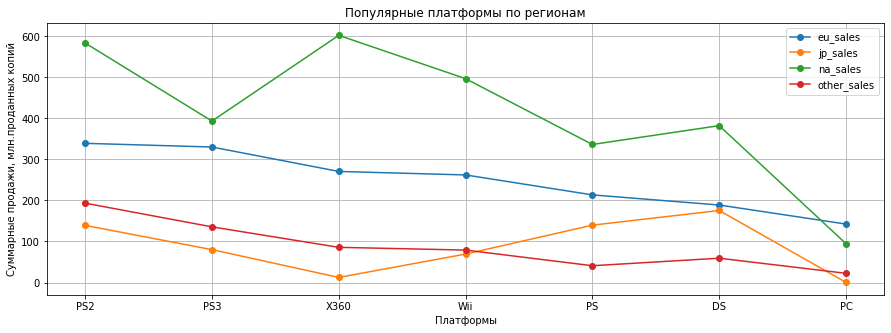

In [36]:
pivot.plot(grid=True, figsize=(15, 5), style ='-o')
plt.title('Популярные платформы по регионам')
plt.ylabel('Суммарные продажи, млн.проданных копий')

plt.xlabel('Платформы')

***
Как видно, большую популярность по продажам игровых платформ имеет Северная америка, в основном прибыль приносят приставки PS2 и X360. На втором месте по количеству продаж идут европейские страны( там большую популярность имеют платформы PS2 и PS3). В Японии популярны DS и PS2( это и не удивительно-ведь это японские фирмы). 
***

### Топ-5 игровых жанорв по регионам

In [37]:
pivot2=user_plat.pivot_table(user_plat,  index=['genre'], aggfunc=np.sum).sort_values(by='na_sales',ascending=False).head(7)
pivot2

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,519.13,161.43,879.01,184.60
Sports,376.79,135.54,684.43,134.51
Shooter,317.34,38.76,592.24,104.11
Platform,200.35,130.83,445.50,51.09
Misc,212.74,108.11,407.27,74.39
Racing,236.51,56.71,359.35,76.10
Role-Playing,188.71,355.41,330.81,59.63


Text(0.5, 0, 'жанр')

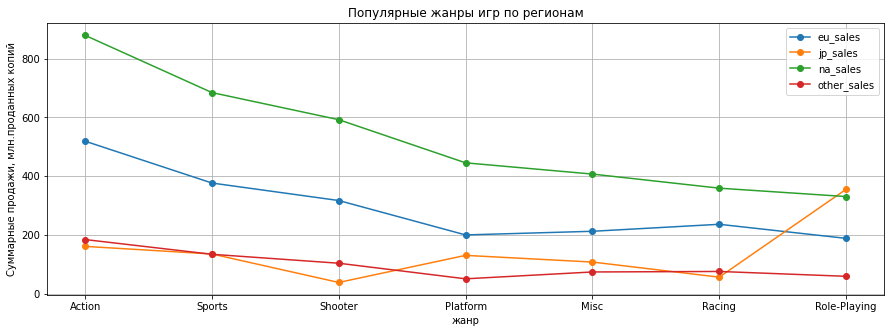

In [38]:
pivot2.plot(grid=True, figsize=(15, 5), style ='-o')
plt.title('Популярные жанры игр по регионам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('жанр')

По графика видно, что большую часть продаж имею игры в жанрах ACTION (не зависимо от  региона), а в Японии больше всего популярны игры в жанре Role-playing (так называемые ролевые игры)

###   Топ 5 платформ и игровых жанорво по регионам по столбчатым диаграммам

In [39]:
na_sales=df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(6)
eu_sales=df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(6)
jp_sales=df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(6)
other_sales=df.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(6)

Для большей наглядности построю столбчатые диаграммы по популярностям приставок и игровых жанров в разных реионах.

<AxesSubplot:xlabel='platform'>

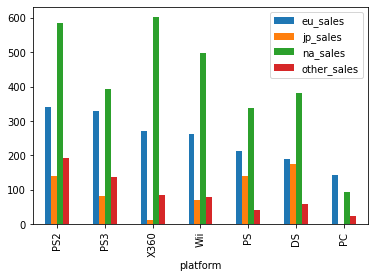

In [40]:
pivot.plot.bar()

<AxesSubplot:xlabel='genre'>

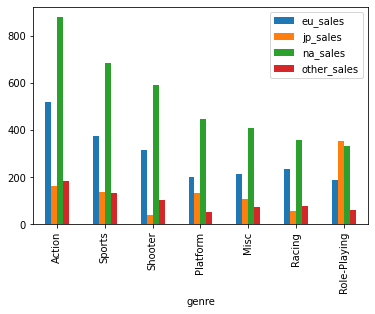

In [41]:
pivot2.plot.bar()

###  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Система ESRB - США, Мексика и Канада  \
EC	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.   \
E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.  \
E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.   \
T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.   \
M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.  \
AO	Подходит для взрослых старше 18 лет.    Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.    \
RP	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

In [42]:
esrb=df[['na_sales','eu_sales','jp_sales','other_sales','rating']]
esrb=esrb.groupby('rating').sum().reset_index().sort_values(by='na_sales',ascending=False)
esrb

,rating,na_sales,eu_sales,jp_sales,other_sales
2,E,1292.99,710.25,198.11,234.17
0,-1,1240.68,613.30,841.93,151.00
8,T,759.75,427.03,151.40,155.17
6,M,748.48,483.97,64.24,177.10
3,E10+,353.32,188.52,40.20,73.56
5,K-A,2.56,0.27,1.46,0.03
4,EC,1.53,0.11,0.00,0.11
1,AO,1.26,0.61,0.00,0.09
7,RP,0.00,0.08,0.00,0.01


<AxesSubplot:xlabel='rating'>

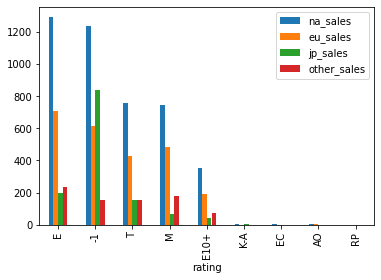

In [43]:
esrb.plot.bar(x='rating')

По графику можно сделать такое суждение:Самые большие продажи и игр категории E, т.е. у тех игр, у которых нет возрастных ограничений. (значение -1 это пропуски в рейтинге по ним ничего сказать нельзя.) Далее в рейтинге продаж идут игры с рейтингом Т( подходит для лиц страше 13 лет) - это в онсонвном та категория людей по возрасту, которая больше проводжит времени за играми. 


## Проверка гипотез

Гипотезы:

   1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   2. Средние пользовательские рейтинги жанров Action и Sports разные. \
       Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.   \
         Определим пороговое значение alpha = 0.05

### Средние пользовательские рейтинги XOne и PC одинаковые

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.   \
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Для того, что бы не портить проверки гипотез я возьму реальные оценки пользователей( в начале исследования я пропуски заменила на -1 и tbd также заменила на -1) их я в расчет братьне буду.

In [44]:
xbox_one_ratings = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
pc_ratings = df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings)

print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -4.368333815003015
p-value = 1.3896435534e-05

Пороговое значение alpha = 0.05


In [45]:
alpha=0.05
results = st.ttest_ind(xbox_one_ratings,pc_ratings,equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print()
print("Средний пользовательский рейтинг игровой приставки XOne:",xbox_one_ratings.mean())
print("Средний пользовательский рейтинг игр на PC :",pc_ratings.mean() )

p-значение:  4.935072360183565e-06
Отвергаем нулевую гипотезу

Средний пользовательский рейтинг игровой приставки XOne: 6.521428571428572
Средний пользовательский рейтинг игр на PC : 7.062467532467533


Гипотеза опровергнута: Средний пользовательский рейтинг платформ XOne и PC отличается.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [46]:
action_rating = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
sport_rating = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']


#action_rating=df.query('genre=="Action"')
#sports_rating=df.query('genre=="Sports"')
#action_rating=action_rating[~action_rating['user_score'].isin(-1)]   
                           
                           
alpha=0.05
results = st.ttest_ind(action_rating,sport_rating,equal_var = False )
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print()
print("Средний пользовательский рейтинг игр в жанре Action: ",action_rating.mean())
print('Средний пользовательский рейтинг игр в жанре Sports:',sport_rating.mean() )    

p-значение:  0.11483818791498286
Не получилось отвергнуть нулевую гипотезу

Средний пользовательский рейтинг игр в жанре Action:  7.054043715846995
Средний пользовательский рейтинг игр в жанре Sports: 6.961196736174069


Гипотеза не подтвердилась: Средний пользовательский рейтинг жанров Action и Sports одинаковый. 


## Общий вывод

Мы получили данные до 2016 года. Ознакомились с файлом: заметили пропуски и неверные типы данных в некоторых столбцах, обработали файл: изменили названия всех столбцов – привели всё к нижнему регистру, удалили 2 пропуска в столбцах "Name", "Year_of_Release", обнаружили некорректное значение "tbd" в столбце "user_score" заменили на пропуск, заменили пустые значения в столбцах ['user_score'] ,['critic_score'] ,['rating'] на удобное значение «-1» , данный маркер в дальнейшем будем исключать при анализе. Добавили отдельный столбе 'sum_sales' - суммарные продажи во всех регионах. Сделали замену типов данных столбцов на нужный формат.   \

Провели исследовательский анализ: Начинается наш период с 1980 года. До 1995 года продавались тяжело игры. После 1995 года наблюдается постепенный рост продаж. Примерно с 2008 года наблюдается уже спад. Жизненный цикл одной игры - 10 лет. Видимо, это связано с выпуском новой игры, т.е. появилась новая игра и спрос на старую постепенно падает. Определили актуальный период с 2005 года по 2015 год, т.к. данные за 2016 год могут быть неполными. За этот период наблюдается медленный спад актуальности платформ, и только рост 2 платформ - PS4 и XOne. Выделили 10 самых популярных игр: самая первая игра PS выпустилась в 1993 году, была на пике своей популярности в 98 году, и после выхода в 2000 году новых игр PS2 и GBA выдохлась к 2003 году, PS2 и GBA ждала та же участь- всё было ничего , особенно у PS2, пока не вышла "молодежь"- DS, Wii,X360, PS3 и самая менее популярная из этого списка- PSP. В 2013 году вышла новая игра - PS4, которая отняла всё внимание игроманов и уже в 2015 году ей не было равных. Но можем предположить, что и её популярность будет падать.    \

Построилиграфик «ящик с усами» по глобальным продажам игр в разбивке по платформам и выявили, что медианные значения суммарных продаж данных платформ сильно не отличаются, 3-ие квартили и максимальные значения платформ X360 и PS3, PS занимают самые высокие позиции по сравнению с остальными платформами, самый большой выброс значений и низкий 3-ий квартиль у платформы DS.  \

Составили портреты пользователей из каждого региона: Средне-статистический пользователь из Северной Америки пользуется, в основном, платформами X360 и PS4, предпочитает игровые жанры "Action" и "Shoter" и игры с рейтингом "Для всех возрастов".  \

Средне-статистический пользователь из Европы предпочитает платформы PS4 и PS3, жанры "Action" и "Shoter" и игры с рейтингом "Для всех возрастов".   \

Средне-статистический пользователь из Японии отдает своё предпочтение платформе 3DS, жанру "Role-Playing" и "Action", рейтингу "Для всех".   \

Планируемая кампания на 2017-й:  \

Так как мы заметили, что жизненный цикл игр -10 лет и по графикам, что все игры на данный момент находятся на стадии спада своей популярности. Считаем, что здесь наибольшая вероятность "оживить" продажу можно - платформу PS4 (дата выхода 2013). По свежести дате выхода предыдущие игры X360, PS3 "изжили своё".  \
Предлагаем принять разные стратегии по повышению продаж в регионах в зависимости от актуальных параметров игр, т.е. использовать портреты средне-статистического пользователя каждого региона.  \
Принять важное замечание, что польше половины продаж сделано в Северной Америке.  \
Предлагаем выпустить новую игру, например, PS5 на базе платформы X360 и PS4 c жанром "Action" и "Sports", рейтингом "Для взрослых" и запустить продажу в Северной Америке и Европе. Для Японии выпустить больше игр на платформе 3DS, жанру Role-Playing, рейтингу "Для всех", но при этом использовать рекламные акции о популярных платформах в других регионах для ознакомления. Учитывая численность населения данных регионов,можно сделать вывод, что японцы заядлые игроманы!